# Importing libraries and data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [4]:
path = r'C:\Users\Dan\Desktop\Career Foundry\Achievement 6'

In [5]:
#Import Dataframe
df = pd.read_csv(os.path.join(path,'Data', 'Prepared Data', 'Life Expectancy prepared.csv'), index_col = False)

In [6]:
# check the version of matplot
matplotlib.__version__

'3.7.0'

In [7]:
# Ensuring the charts created are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [8]:
# Importing second dataframe as they will need to be merged
df_em = pd.read_csv(os.path.join(path,'Data', 'Prepared Data', 'Emissions prepared.csv'), index_col = False)

In [9]:
df . head()

,Unnamed: 0,country_code,country_name,year,Life Expectancy
0,0,ABW,Aruba,1960,64.152
1,1,ABW,Aruba,1961,64.537
2,2,ABW,Aruba,1962,64.752
3,3,ABW,Aruba,1963,65.132
4,4,ABW,Aruba,1964,65.294


In [10]:
df_em . head()

,Unnamed: 0,Country,country_code,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,0,Afghanistan,AFG,1750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Afghanistan,AFG,1751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Afghanistan,AFG,1752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Afghanistan,AFG,1753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Afghanistan,AFG,1754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df . shape

(12179, 5)

In [12]:
df_em . shape

(59024, 12)

In [13]:
# removing Unnamed columns in both dataframes
#

In [14]:
df_em = df_em.drop("Unnamed: 0", axis=1)

In [15]:
df . head()

,Unnamed: 0,country_code,country_name,year,Life Expectancy
0,0,ABW,Aruba,1960,64.152
1,1,ABW,Aruba,1961,64.537
2,2,ABW,Aruba,1962,64.752
3,3,ABW,Aruba,1963,65.132
4,4,ABW,Aruba,1964,65.294


In [16]:
df_em . head()

,Country,country_code,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,1751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,1752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,AFG,1753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,AFG,1754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# merging dataframes on country code
df_merged = pd.merge(df, df_em, on="country_code", how="right")

In [18]:
df_merged . shape

(3233264, 15)

In [19]:
df . shape

(12179, 5)

In [20]:
# changing column name to attempt merge on year and country code
df = df.rename(columns={'year':'Year'})

In [21]:
df . head()

,Unnamed: 0,country_code,country_name,Year,Life Expectancy
0,0,ABW,Aruba,1960,64.152
1,1,ABW,Aruba,1961,64.537
2,2,ABW,Aruba,1962,64.752
3,3,ABW,Aruba,1963,65.132
4,4,ABW,Aruba,1964,65.294


In [22]:
# attempting different merge
df_merged2 = pd.merge(df_em, df, on=["country_code", "Year"], how="left")

In [23]:
df_merged2 . shape

(59024, 14)

In [24]:
df_merged2 . head()

,Country,country_code,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Unnamed: 0,country_name,Life Expectancy
0,Afghanistan,AFG,1750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [25]:
df_merged2 . tail()

,Country,country_code,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Unnamed: 0,country_name,Life Expectancy
59019,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682,14836.0,World,72.543044
59020,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753,14837.0,World,72.785237
59021,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633,14838.0,World,72.976850
59022,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423,14839.0,World,72.265011
59023,Global,WLD,2021,37123.850352,14979.598083,11837.159116,7921.829472,1672.592372,416.525563,296.145746,4.693699,NaN,NaN,NaN


In [26]:
# removing rows for year 2021 as they are not present in life expectancy dataframe
df_merged2 = df_merged2[df_merged2['Year'] != 2021]

In [27]:
df_merged2 . tail()

,Country,country_code,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Unnamed: 0,country_name,Life Expectancy
59018,Global,WLD,2016,35524.193212,14360.605245,12023.833280,6973.648992,1487.616801,378.385157,300.103737,4.728065,14835.0,World,72.345221
59019,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682,14836.0,World,72.543044
59020,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753,14837.0,World,72.785237
59021,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633,14838.0,World,72.976850
59022,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423,14839.0,World,72.265011


In [28]:
df_merged2 . shape

(58807, 14)

In [29]:
# remove country_name column as we already have Country column
df_merged2 = df_merged2.drop("country_name", axis=1)

In [30]:
df_merged2 . columns

Index(['Country', 'country_code', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita', 'Unnamed: 0',
       'Life Expectancy'],
      dtype='object')

In [31]:
# Check for missing values
df_merged2.isnull().sum()

Country                0
country_code           0
Year                   0
Total                  0
Coal                   0
Oil                    0
Gas                    0
Cement                 0
Flaring                0
Other                  0
Per Capita             0
Unnamed: 0         46935
Life Expectancy    46935
dtype: int64

these missing values are under life expectancy where we have emissions data from decades or centuries ago but no life expectancy data. I will leave them in for now

In [32]:
# Find duplicates
df_dups = df_merged2[df_merged2.duplicated()]

In [33]:
df_dups

,Country,country_code,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Unnamed: 0,Life Expectancy


no duplicates

# Correlations

Questions to explore

What happens to a country’s average life expectancy as emission levels increase?

When looking at emissions and life expectancy, is there a correlation?

How long does it take after the initial increase in a country’s emissions (so assuming leading to
improved education, healthcare etc) does it take until we see an increase in the life expectancy?

Is there a decline in the rate of increasing life expectancy or even a decrease once emission levels
get to a certain amount per capita? If so, what amount?

How do emissions and life expectancy compare across different parts of the world? Is it more
country specific or region?

Globally, is there a trend linking life expectancy and emissions?

In [34]:
# Create a correlation matrix using pandas
df_merged2.corr()

C:\Users\Dan\AppData\Local\Temp\ipykernel_18348\1515116775.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_merged2.corr()


,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Unnamed: 0,Life Expectancy
Year,1.000000,0.087366,0.085153,0.086972,0.081438,0.073950,0.083794,0.066909,0.347138,0.002446,0.475854
Total,0.087366,1.000000,0.971470,0.978131,0.961254,0.920542,0.912651,0.834119,0.092851,0.113456,0.059956
Coal,0.085153,0.971470,1.000000,0.907670,0.884256,0.921115,0.832002,0.834839,0.090155,0.095761,0.055809
Oil,0.086972,0.978131,0.907670,1.000000,0.960257,0.853847,0.938830,0.758933,0.090267,0.123650,0.058635
Gas,0.081438,0.961254,0.884256,0.960257,1.000000,0.884843,0.910343,0.826796,0.097729,0.128705,0.067255
Cement,0.073950,0.920542,0.921115,0.853847,0.884843,1.000000,0.806194,0.922009,0.053384,0.070813,0.058556
Flaring,0.083794,0.912651,0.832002,0.938830,0.910343,0.806194,1.000000,0.690742,0.089355,0.118417,0.024311
Other,0.066909,0.834119,0.834839,0.758933,0.826796,0.922009,0.690742,1.000000,0.056290,0.049680,0.064043
Per Capita,0.347138,0.092851,0.090155,0.090267,0.097729,0.053384,0.089355,0.056290,1.000000,-0.069639,0.412121
Unnamed: 0,0.002446,0.113456,0.095761,0.123650,0.128705,0.070813,0.118417,0.049680,-0.069639,1.000000,-0.065414


In [35]:
# selecting columns for matrix 
corr_matrix = df_merged2[['Total', 'Life Expectancy', 'Per Capita']].corr()

In [36]:
corr_matrix

,Total,Life Expectancy,Per Capita
Total,1.000000,0.059956,0.092851
Life Expectancy,0.059956,1.000000,0.412121
Per Capita,0.092851,0.412121,1.000000


C:\Users\Dan\AppData\Local\Temp\ipykernel_18348\1397787150.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_merged2.corr())


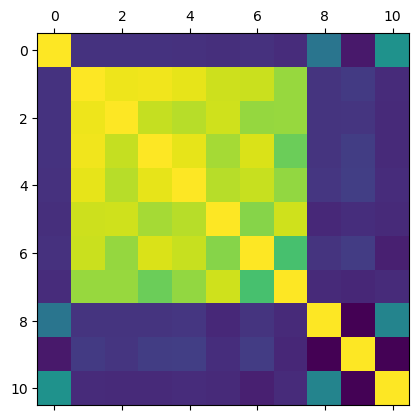

In [37]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_merged2.corr())
plt.show()

In [38]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,Total,Life Expectancy,Per Capita
Total,1.000000,0.059956,0.092851
Life Expectancy,0.059956,1.000000,0.412121
Per Capita,0.092851,0.412121,1.000000


C:\Users\Dan\AppData\Local\Temp\ipykernel_18348\2886374846.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_merged2.corr())


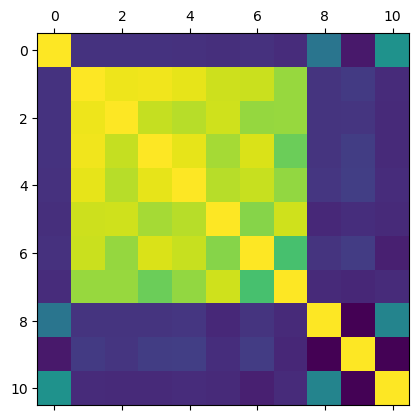

In [39]:
# Save figure
plt.matshow(df_merged2.corr())
plt.savefig("out.png") 



In [40]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\Dan\\Desktop\\Career Foundry\\Achievement 6\\Scripts'

C:\Users\Dan\AppData\Local\Temp\ipykernel_18348\2299788626.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_merged2.corr(), fignum=f.number) # type of plot


Text(0.5, 1.0, 'Correlation Matrix')

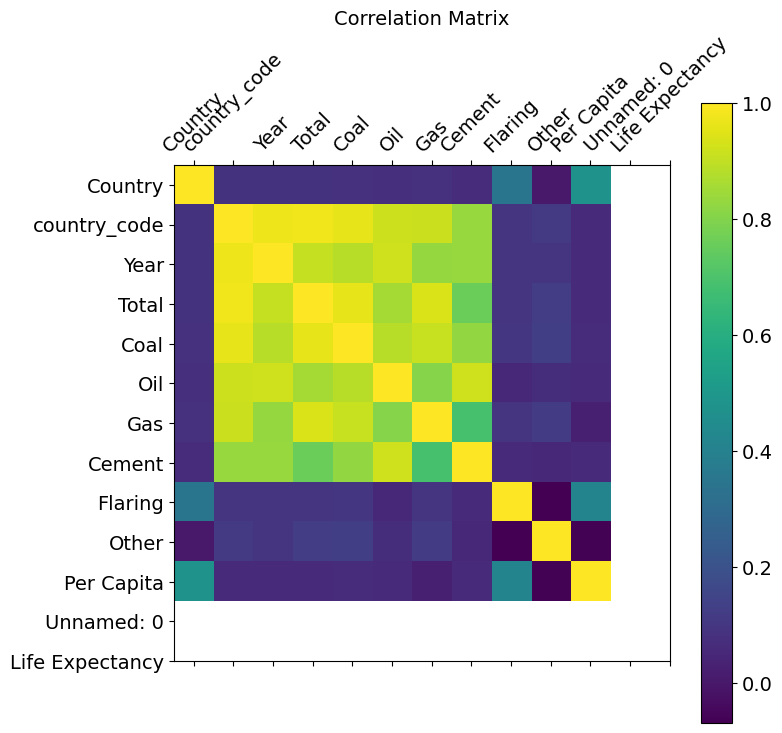

In [41]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_merged2.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_merged2.shape[1]), df_merged2.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_merged2.shape[1]), df_merged2.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

# create a correlation using seaborn

In [42]:
df_merged2 . columns

Index(['Country', 'country_code', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita', 'Unnamed: 0',
       'Life Expectancy'],
      dtype='object')

In [43]:
# removing unnamed column
df_merged2 = df_merged2.drop("Unnamed: 0", axis=1)

In [44]:
df_merged2 . columns

Index(['Country', 'country_code', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita', 'Life Expectancy'],
      dtype='object')

In [45]:
# Create a subset excluding columns

sub = df_merged2[['Per Capita', 'Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Life Expectancy']]

In [46]:
sub

,Per Capita,Total,Coal,Oil,Gas,Cement,Flaring,Life Expectancy
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...
59018,4.728065,35524.193212,14360.605245,12023.833280,6973.648992,1487.616801,378.385157,72.345221
59019,4.749682,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,72.543044
59020,4.792753,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,72.785237
59021,4.775633,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,72.976850


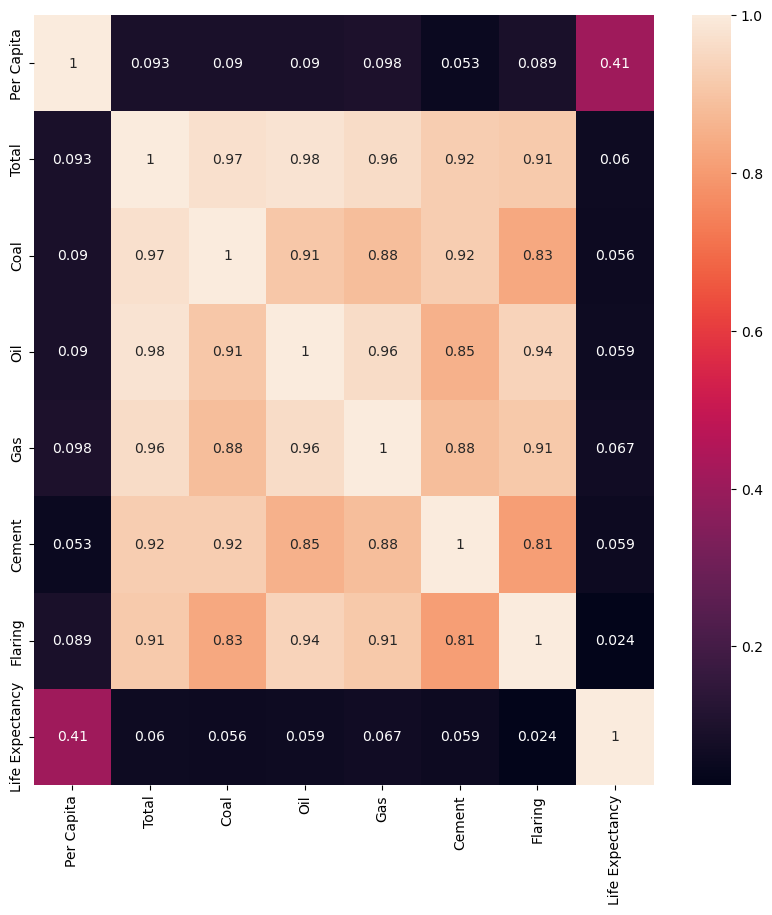

In [47]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

The closest correlation to Life Expectancy is connected to Emissions Per Capita

# Scatterplot

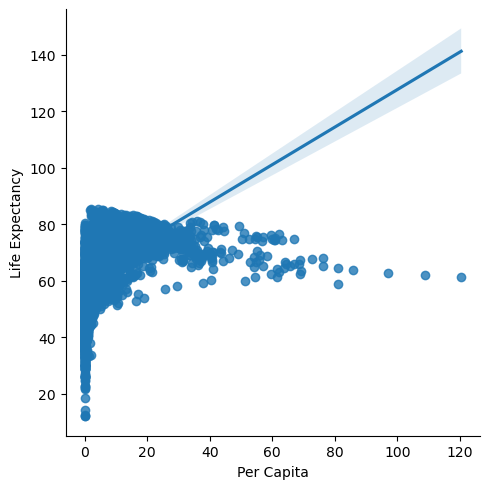

In [48]:
# Create a scatterplot for Per Capita and Life Expectancy columns in seaborn

sns.lmplot(x = 'Per Capita', y = 'Life Expectancy', data = df_merged2)

In [49]:
#creating sub set which drops rows containing no life expectancy
df3 = df_merged2.dropna(subset=['Life Expectancy'])

In [50]:
df3 . shape

(11872, 12)

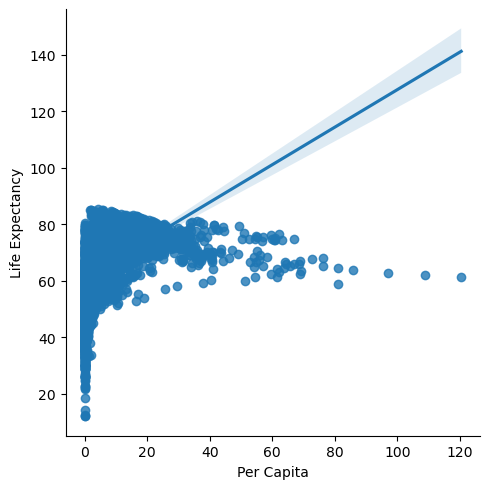

In [51]:
# Create a scatterplot for Per Capita and Life Expectancy columns in seaborn from df3 dataframe

sns.lmplot(x = 'Per Capita', y = 'Life Expectancy', data = df3)

This scatter plot shows a positive association between the variables, but not a strong relationship, and the data is nonlinear.

# Pair Plot

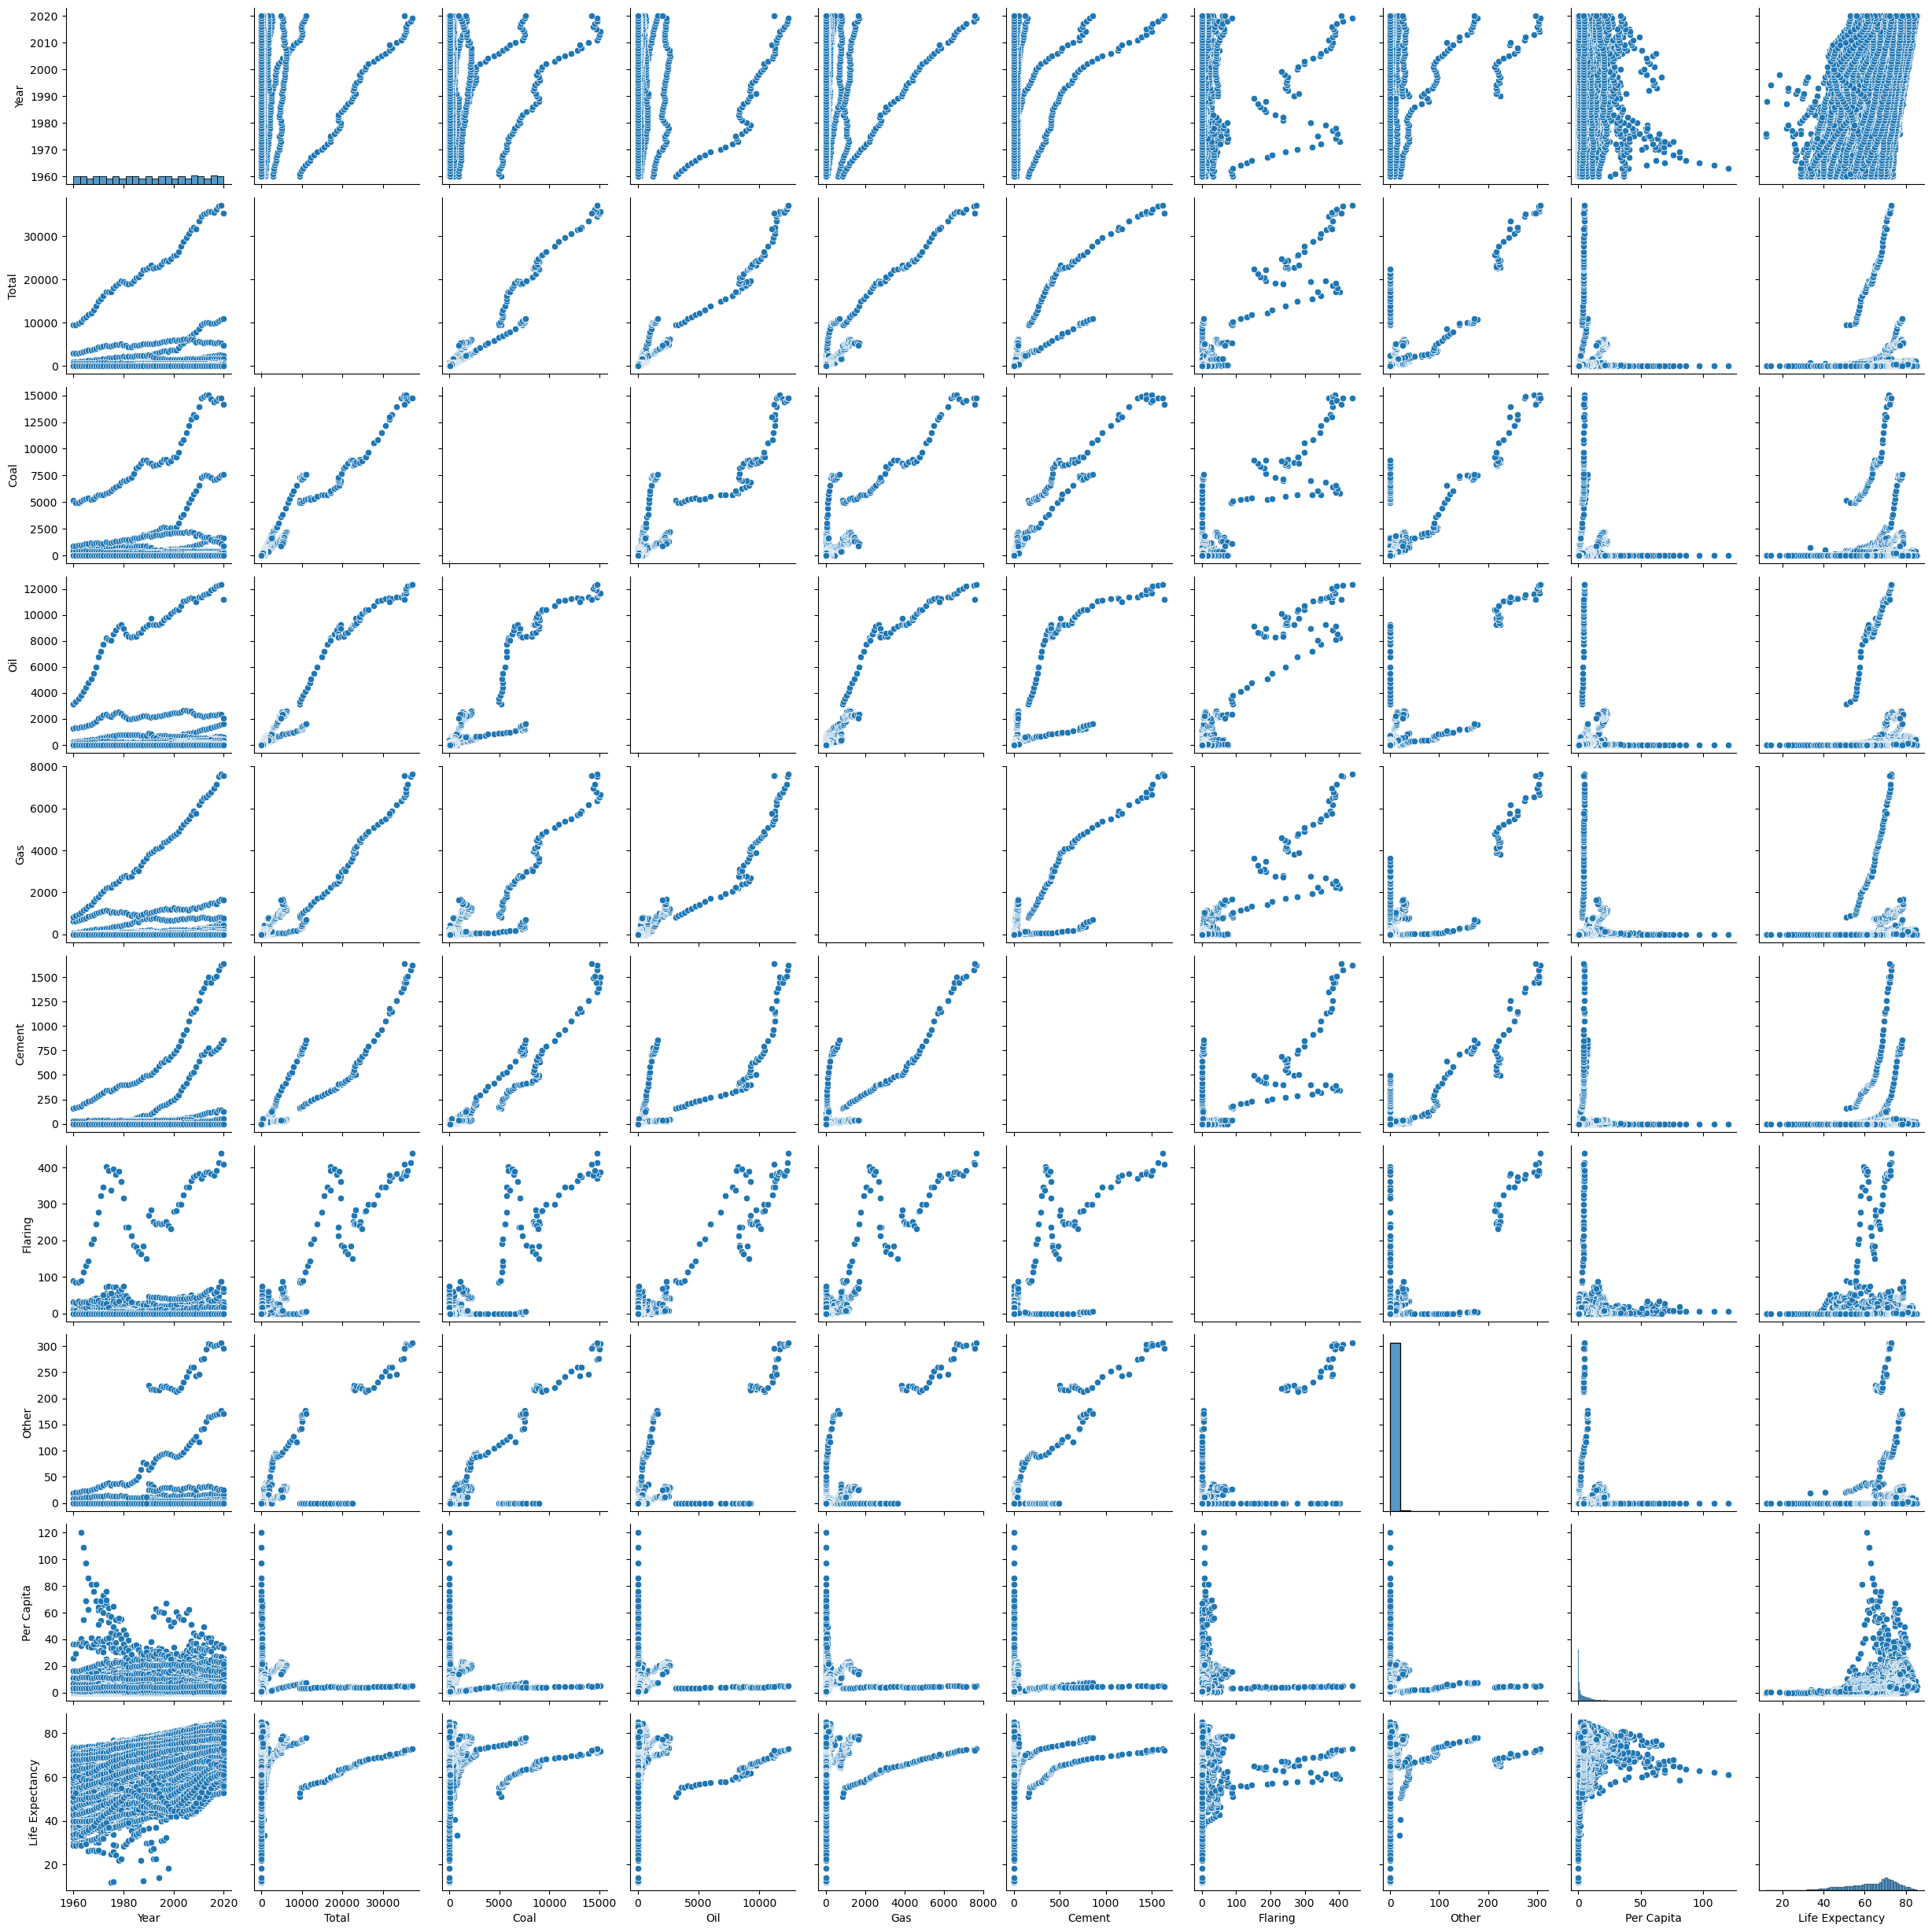

In [52]:
# Create a pair plot 

g = sns.pairplot(df3)

In [53]:
sub

,Per Capita,Total,Coal,Oil,Gas,Cement,Flaring,Life Expectancy
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...
59018,4.728065,35524.193212,14360.605245,12023.833280,6973.648992,1487.616801,378.385157,72.345221
59019,4.749682,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,72.543044
59020,4.792753,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,72.785237
59021,4.775633,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,72.976850


In [54]:
df3 . head()

,Country,country_code,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Life Expectancy
210,Afghanistan,AFG,1960,0.413885,0.127115,0.268758,0.0,0.018012,0.0,0.0,0.048001,32.535
211,Afghanistan,AFG,1961,0.490798,0.175872,0.293120,0.0,0.021806,0.0,0.0,0.055835,33.068
212,Afghanistan,AFG,1962,0.688594,0.296784,0.362736,0.0,0.029074,0.0,0.0,0.076775,33.547
213,Afghanistan,AFG,1963,0.706736,0.263808,0.392048,0.0,0.050880,0.0,0.0,0.077176,34.016
214,Afghanistan,AFG,1964,0.838551,0.300448,0.476320,0.0,0.061783,0.0,0.0,0.089632,34.494


In [55]:
#creating subset for second pair plot
subset2 = df3[['Per Capita', 'Life Expectancy']]

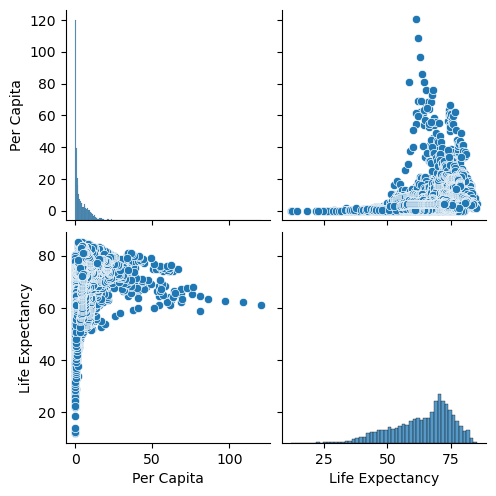

In [56]:
g2 = sns.pairplot(subset2)

This seems to show that there are more instances of higher life expectancy when emissions per capita are between 10 and 50 per capita

# Categorical plot

<Axes: xlabel='Life Expectancy', ylabel='Count'>

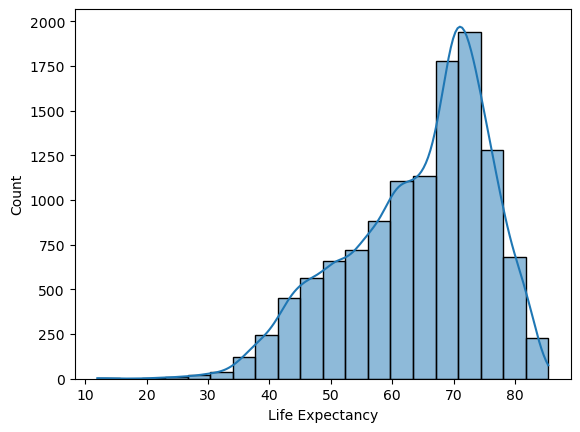

In [57]:
# create a histogram for life expectancy

sns.histplot(df3['Life Expectancy'], bins = 20, kde = True)

In [58]:
# creating categories
df_merged2.loc[df_merged2['Life Expectancy'] <65, 'Life Expectancy category'] = 'Low Life Expectancy'

In [59]:
df_merged2.loc[(df_merged2['Life Expectancy'] >= 65) & (df_merged2['Life Expectancy'] < 75), 'Life Expectancy category'] = 'Medium Life Expectancy'

In [60]:
df_merged2.loc[df_merged2['Life Expectancy'] >= 75, 'Life Expectancy category'] = 'High Life Expectancy'

In [61]:
df_merged2['Life Expectancy category'].value_counts(dropna = False)

NaN                       46935
Low Life Expectancy        5317
Medium Life Expectancy     4637
High Life Expectancy       1918
Name: Life Expectancy category, dtype: int64

the NaN are from the Life Expectancy column from the years without data

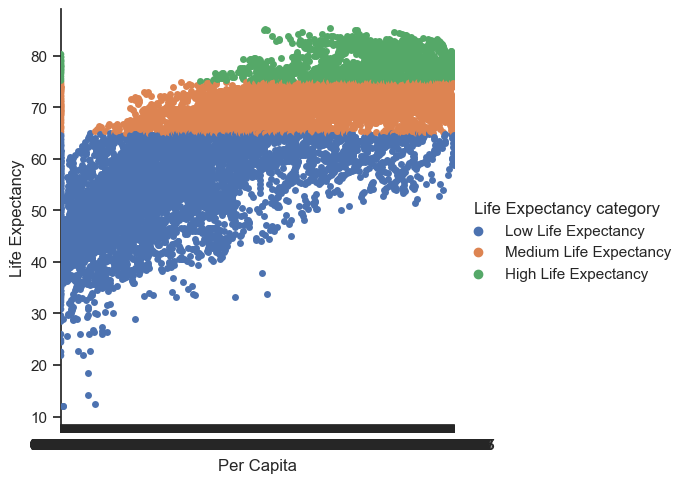

In [62]:
# Create a categorical plot in seaborn using the categories created above

sns.set(style="ticks")
g3 = sns.catplot(x="Per Capita", y="Life Expectancy", hue="Life Expectancy category", data=df_merged2)

In [63]:
# fig = g.get_figure()
g2.savefig("out.png") 

In [64]:
# fig = g.get_figure()
g3.savefig("out.png") 



In the categorical plot above, the most dense collection of High Life Expectancy appears to coincide with the highest emissions, and the largest collection of Low Life Expectancy with low emissions per capita. Interestingly, it appears that the highest life expectancies are in the mid-range of emissions per capita, but only marginally.

In [65]:
# filter the rows where country_code is equal to GBR to inspect the United Kingdom's per capita and life expectancy over time
subset = df_merged2[df_merged2['country_code'] == 'GBR']

In [66]:
subset . head()

,Country,country_code,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Life Expectancy,Life Expectancy category
55488,United Kingdom,GBR,1750,9.350528,9.350528,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
55489,United Kingdom,GBR,1751,9.350528,9.350528,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
55490,United Kingdom,GBR,1752,9.354192,9.354192,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
55491,United Kingdom,GBR,1753,9.354192,9.354192,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
55492,United Kingdom,GBR,1754,9.357856,9.357856,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [77]:
#Import Dataframe
df_ukle = pd.read_csv(os.path.join(path,'Data', 'Prepared Data', 'UKLE.csv'), index_col = False)

In [78]:
df_ukle . shape

(29, 2)

In [79]:
df_ukle

,Year,Life Expectancy at Birth
0,1820,40.53
1,1825,40.46
2,1830,41.52
3,1835,40.85
4,1840,40.55
5,1845,41.80
6,1850,39.59
7,1855,40.66
8,1860,41.80
9,1865,41.18


In [82]:
subset . info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 55488 to 55758
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Country                   271 non-null    object        
 1   country_code              271 non-null    object        
 2   Year                      0 non-null      datetime64[ns]
 3   Total                     271 non-null    float64       
 4   Coal                      271 non-null    float64       
 5   Oil                       271 non-null    float64       
 6   Gas                       271 non-null    float64       
 7   Cement                    271 non-null    float64       
 8   Flaring                   271 non-null    float64       
 9   Other                     271 non-null    float64       
 10  Per Capita                271 non-null    float64       
 11  Life Expectancy           61 non-null     float64       
 12  Life Expectancy 

In [90]:
df_uk = subset[['country_code', 'Year', 'Country', 'Per Capita', 'Life Expectancy']]

In [91]:
df_uk . shape

(271, 5)

In [94]:
df_uk2 = df_uk.loc[0:10, ['country_code', 'Year', 'Country', 'Per Capita', 'Life Expectancy']]

In [95]:
df_uk3 = df_uk2.copy()

In [96]:
df_uk3 . shape

(0, 5)

In [97]:
df_uk . shape

(271, 5)

In [98]:
df_uk2 . shape

(0, 5)

In [99]:
df_uk . shape

(271, 5)

In [100]:
df_uk . info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 55488 to 55758
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_code     271 non-null    object 
 1   Year             271 non-null    int64  
 2   Country          271 non-null    object 
 3   Per Capita       271 non-null    float64
 4   Life Expectancy  61 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 20.8+ KB


In [105]:
df_1820 = df_uk.loc[df_uk['Year'] >= 1820]

In [106]:
df_1820 . shape

(0, 5)

In [108]:
df_uk . head()

,country_code,Year,Country,Per Capita,Life Expectancy
55488,GBR,-9223372036854775808,United Kingdom,0.0,NaN
55489,GBR,-9223372036854775808,United Kingdom,0.0,NaN
55490,GBR,-9223372036854775808,United Kingdom,0.0,NaN
55491,GBR,-9223372036854775808,United Kingdom,0.0,NaN
55492,GBR,-9223372036854775808,United Kingdom,0.0,NaN


In [109]:
subset . head()

,Country,country_code,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Life Expectancy,Life Expectancy category
55488,United Kingdom,GBR,NaT,9.350528,9.350528,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
55489,United Kingdom,GBR,NaT,9.350528,9.350528,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
55490,United Kingdom,GBR,NaT,9.354192,9.354192,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
55491,United Kingdom,GBR,NaT,9.354192,9.354192,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
55492,United Kingdom,GBR,NaT,9.357856,9.357856,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [110]:
df_merged2 . head()

,Country,country_code,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Life Expectancy,Life Expectancy category
0,Afghanistan,AFG,1750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,Afghanistan,AFG,1751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,Afghanistan,AFG,1752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,Afghanistan,AFG,1753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,Afghanistan,AFG,1754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [193]:
# starting again with GBR rows as have encountered problems
# filter the rows where country_code is equal to GBR to inspect the United Kingdom's per capita and life expectancy over time
df_ukemi = df_merged2[df_merged2['country_code'] == 'GBR']

In [194]:
df_ukemi . head()

,Country,country_code,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Life Expectancy,Life Expectancy category
55488,United Kingdom,GBR,1750,9.350528,9.350528,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
55489,United Kingdom,GBR,1751,9.350528,9.350528,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
55490,United Kingdom,GBR,1752,9.354192,9.354192,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
55491,United Kingdom,GBR,1753,9.354192,9.354192,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
55492,United Kingdom,GBR,1754,9.357856,9.357856,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [195]:
df_ukemi . info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 55488 to 55758
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   271 non-null    object 
 1   country_code              271 non-null    object 
 2   Year                      271 non-null    int64  
 3   Total                     271 non-null    float64
 4   Coal                      271 non-null    float64
 5   Oil                       271 non-null    float64
 6   Gas                       271 non-null    float64
 7   Cement                    271 non-null    float64
 8   Flaring                   271 non-null    float64
 9   Other                     271 non-null    float64
 10  Per Capita                271 non-null    float64
 11  Life Expectancy           61 non-null     float64
 12  Life Expectancy category  61 non-null     object 
dtypes: float64(9), int64(1), object(3)
memory usage: 29.6+ KB


In [196]:
# attempting to remove rows containing the years 1750 to 1819
df_ukemi = df_ukemi.loc[(df_ukemi['Year'] < 1750) | (df_ukemi['Year'] > 1819)]

In [197]:
df_ukemi . head()

,Country,country_code,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Life Expectancy,Life Expectancy category
55558,United Kingdom,GBR,1820,42.528048,42.528048,0.0,0.0,0.0,0.0,0.0,2.002356,NaN,NaN
55559,United Kingdom,GBR,1821,42.872464,42.872464,0.0,0.0,0.0,0.0,0.0,1.989349,NaN,NaN
55560,United Kingdom,GBR,1822,44.521264,44.521264,0.0,0.0,0.0,0.0,0.0,2.039266,NaN,NaN
55561,United Kingdom,GBR,1823,46.873552,46.873552,0.0,0.0,0.0,0.0,0.0,2.119345,NaN,NaN
55562,United Kingdom,GBR,1824,49.082944,49.082944,0.0,0.0,0.0,0.0,0.0,2.190518,NaN,NaN


In [198]:
# renaming column in df_ukle
df_ukle = df_ukle.rename(columns={'Life Expectancy at birth': 'Life Expectancy'})

In [199]:
df_ukle . head()

,Year,Life Expectancy at Birth
0,1820,40.53
1,1825,40.46
2,1830,41.52
3,1835,40.85
4,1840,40.55


In [200]:
df_ukle . info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      29 non-null     int64  
 1   Life Expectancy at Birth  29 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 592.0 bytes


In [201]:
# changing df_ukemi to be every 5 years to match data in other dataframe
df_ukemi = df_ukemi.loc[(df_ukemi['Year'] >= 1820) & (df_ukemi['Year'] <= 2020)]

In [202]:
df_ukemi = df_ukemi.loc[df_ukemi['Year'] % 5 == 0]

In [203]:
df_ukemi

,Country,country_code,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Life Expectancy,Life Expectancy category
55558,United Kingdom,GBR,1820,42.528048,42.528048,0.000000,0.000000,0.000000,0.000000,0.000000,2.002356,NaN,NaN
55563,United Kingdom,GBR,1825,49.592240,49.592240,0.000000,0.000000,0.000000,0.000000,0.000000,2.184873,NaN,NaN
55568,United Kingdom,GBR,1830,67.864608,67.864608,0.000000,0.000000,0.000000,0.000000,0.000000,2.811409,NaN,NaN
55573,United Kingdom,GBR,1835,65.263168,65.263168,0.000000,0.000000,0.000000,0.000000,0.000000,2.564167,NaN,NaN
55578,United Kingdom,GBR,1840,80.959744,80.959744,0.000000,0.000000,0.000000,0.000000,0.000000,3.027098,NaN,NaN
55583,United Kingdom,GBR,1845,99.986896,99.986896,0.000000,0.000000,0.000000,0.000000,0.000000,3.565866,NaN,NaN
55588,United Kingdom,GBR,1850,122.604768,122.604768,0.000000,0.000000,0.000000,0.000000,0.000000,4.510679,NaN,NaN
55593,United Kingdom,GBR,1855,130.442064,130.442064,0.000000,0.000000,0.000000,0.000000,0.000000,4.709610,NaN,NaN
55598,United Kingdom,GBR,1860,167.950432,167.950432,0.000000,0.000000,0.000000,0.000000,0.000000,5.813848,NaN,NaN
55603,United Kingdom,GBR,1865,205.488112,205.451472,0.036640,0.000000,0.000000,0.000000,0.000000,6.829343,NaN,NaN


In [204]:
keep_cols = ['Year', 'Life Expectancy', 'Per Capita']

In [205]:
df_ukemi = df_ukemi[keep_cols]

In [206]:
df_ukemi . head()

,Year,Life Expectancy,Per Capita
55558,1820,NaN,2.002356
55563,1825,NaN,2.184873
55568,1830,NaN,2.811409
55573,1835,NaN,2.564167
55578,1840,NaN,3.027098


In [207]:
df_ukle . head()

,Year,Life Expectancy at Birth
0,1820,40.53
1,1825,40.46
2,1830,41.52
3,1835,40.85
4,1840,40.55


In [209]:
df_ukle.columns

Index(['Year', 'Life Expectancy at Birth'], dtype='object')

In [211]:
df_ukle = df_ukle.rename(columns={'Life Expectancy at Birth': 'Life Expectancy'})

In [215]:
df_ukemi.update(df_ukle['Life Expectancy'])

In [216]:
df_ukemi

,Year,Life Expectancy,Per Capita
55558,1820,NaN,2.002356
55563,1825,NaN,2.184873
55568,1830,NaN,2.811409
55573,1835,NaN,2.564167
55578,1840,NaN,3.027098
55583,1845,NaN,3.565866
55588,1850,NaN,4.510679
55593,1855,NaN,4.709610
55598,1860,NaN,5.813848
55603,1865,NaN,6.829343


In [223]:
df_ukele = pd.merge(df_ukemi, df_ukle[['Year', 'Life Expectancy']], on=['Year'], how='left', suffixes=('', '_y')) 
df_ukele['Life Expectancy'] = df_ukele['Life Expectancy'].fillna(df_ukele['Life Expectancy_y']) 
df_ukele = df_ukele.drop('Life Expectancy_y', axis=1)

In [224]:
df_ukele

,Year,Life Expectancy,Per Capita
0,1820,40.530000,2.002356
1,1825,40.460000,2.184873
2,1830,41.520000,2.811409
3,1835,40.850000,2.564167
4,1840,40.550000,3.027098
5,1845,41.800000,3.565866
6,1850,39.590000,4.510679
7,1855,40.660000,4.709610
8,1860,41.800000,5.813848
9,1865,41.180000,6.829343


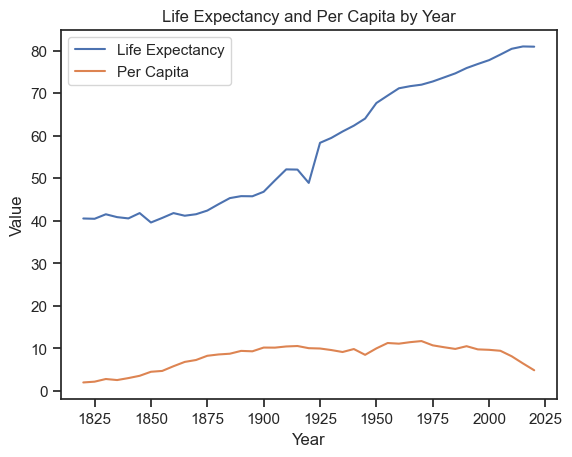

In [227]:
# Putting Life Expectancy and Per Capita in to a chart
df_ukele.plot(x='Year', y=['Life Expectancy', 'Per Capita']) 
plt.xlabel('Year') 
plt.ylabel('Value') 
plt.title('Life Expectancy and Per Capita by Year')
plt.legend(['Life Expectancy', 'Per Capita']) 
plt.show()

 this is an interesting representation of life expectancy and emissions per capita over time in the UK. They both increase simultaneously, emissions level off in the 1900's whilst life expectancy continues to rise apart from a dip following ww1, and by 2020 life expectancy is at is highest level ever, whilst emissions per capita have reduced to their lowest levels since the 1800's. The value on the right is representing both Age and metric tons of emissions just for this visualisations purposes.

Original questions to explore
What happens to a country’s average life expectancy as emission levels increase?
Looking at the UK, they remain stable for the first few decades and then increase. 

When looking at emissions and life expectancy, is there a correlation?
Yes there is some positive correlation.

How long does it take after the initial increase in a country’s emissions (so assuming leading to
improved education, healthcare etc) does it take until we see an increase in the life expectancy?
Only using the UK as an example, it appears to take a few decades. 

Is there a decline in the rate of increasing life expectancy or even a decrease once emission levels
get to a certain amount per capita? If so, what amount?
It appears to slow down once emissions per capita get to around 10 metric tons

How do emissions and life expectancy compare across different parts of the world? Is it more
country specific or region?

Globally, is there a trend linking life expectancy and emissions?

# Early hypothesis

The first time emissions per capita increase, life expectancy will increase within 30 years.

Once emissions per capita reaches 10 metric tons, the increase in life expectancy will slow.

Once the country has become developed and they reduce emissions per capita to below 10 metric tons, life expectancy will change.

The initial increase in a country's emissions per capita leads to an increase in life expectancy, due to an improvement in quality of life factors linked to country development, up to a point where emissions per capita begin to have a negative affect on quality of life. 

# Exporting dataframes

In [228]:
df_ukele.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'UK emissions and life expectancy.csv'))

In [229]:
df_merged2 . shape

(58807, 13)

In [230]:
df_merged2 . columns

Index(['Country', 'country_code', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita', 'Life Expectancy',
       'Life Expectancy category'],
      dtype='object')

In [231]:
df_merged2.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'Emissions Life Expectancy merged.csv'))

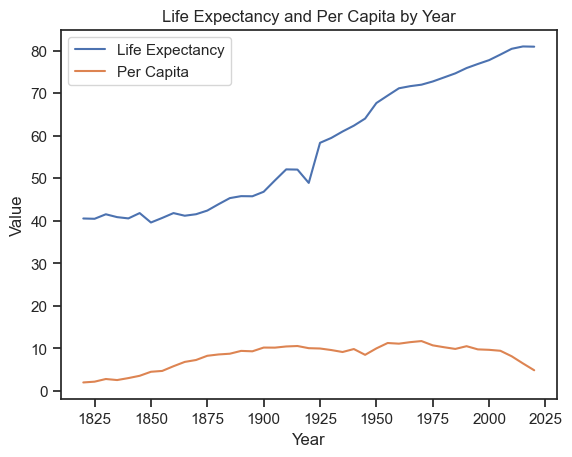

In [235]:
df_ukele.plot(x='Year', y=['Life Expectancy', 'Per Capita']) 
plt.xlabel('Year') 
plt.ylabel('Value') 
plt.title('Life Expectancy and Per Capita by Year')
plt.legend(['Life Expectancy', 'Per Capita']) 
plt.show()

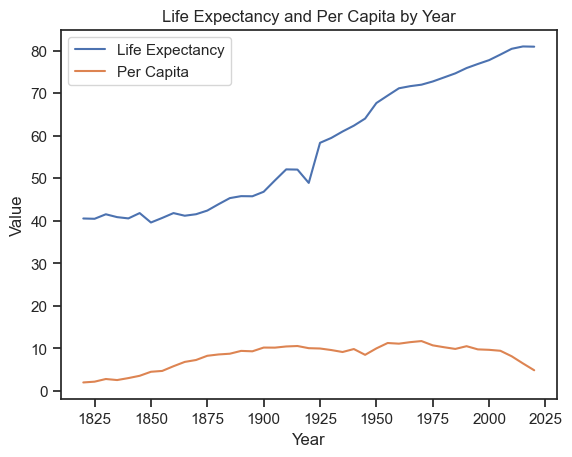

In [237]:
df_ukele.plot(x='Year', y=['Life Expectancy', 'Per Capita']) 
plt.xlabel('Year') 
plt.ylabel('Value') 
plt.title('Life Expectancy and Per Capita by Year') 
plt.legend(['Life Expectancy', 'Per Capita']) 
plt.savefig('plot.png') 
plt.show()